In [13]:

archivo = 'dataCreditos.xls'
data = pd.read_excel(archivo)
print(data.head())
print(data.info())
print(data.describe())

  CIUDAD FECHA LIMITE    ZONA  VALOR FACTURA   SALDO FECHA LLAMADA  \
0  COSTA    2016-05-06  18402         162948   29122    5/05/2016    
1  COSTA    2016-05-11  17102         215156   85156    5/05/2016    
2  COSTA    2016-05-06  18202         113631  113525    30/04/2016   
3  COSTA    2016-05-11  17403         187560   87438    3/05/2016    
4  COSTA    2016-05-16  46106         177603   32465    3/05/2016    

   TIPO DE CONTACTO ESTADO CODIFICACION FECHA DE COMPROMISO   ...  SECCION  \
0  Contacto Directo   pago         pago                  NaN  ...        3   
1  Contacto Directo   pago         pago                  NaN  ...        1   
2  Contacto Directo   pago         pago                  NaN  ...        3   
3  Contacto Directo   pago         pago                  NaN  ...        4   
4  Contacto Directo   pago         pago                  NaN  ...        3   

   CANTIDAD_CAMPANAS  ANTIGUEDAD               NOMBRE POBLADO  \
0                 17          29             

In [22]:
import pandas as pd
from datetime import datetime

# modulo para actualizar la edad del cliente
ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)
data['FECHA NACIMIENTO'] = pd.to_datetime(data['FECHA NACIMIENTO'])

def calcular_edad(fecha_nacimiento):
    fecha_actual = datetime.now()
    edad = fecha_actual.year - fecha_nacimiento.year - ((fecha_actual.month, fecha_actual.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    return edad

data['EDAD ACTUAL'] = data['FECHA NACIMIENTO'].apply(calcular_edad)

print(data[['FECHA NACIMIENTO', 'EDAD ACTUAL']])



    FECHA NACIMIENTO  EDAD ACTUAL
0         1988-05-30         35.0
1         1989-08-07         34.0
2         1993-11-08         29.0
3         1962-04-06         61.0
4         1995-09-20         27.0
..               ...          ...
906       1984-11-21         38.0
907       1978-11-18         44.0
908       1962-06-22         61.0
909       1947-04-07         76.0
910       1973-12-18         49.0

[911 rows x 2 columns]


In [21]:
import pandas as pd
from datetime import datetime

# MODULO PARA ACTUALIZAR LA ANTIGUEDADA DE LA FACTURA
ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

data['FECHA FACTURA'] = pd.to_datetime(data['FECHA FACTURA'])

def calcular_antiguedad(fecha_factura):
    fecha_actual = datetime.now().date()
    antiguedad = (fecha_actual - fecha_factura.date()).days
    return antiguedad

data['ANTIGUEDAD'] = data['FECHA FACTURA'].apply(calcular_antiguedad)

print(data[['FECHA FACTURA', 'ANTIGUEDAD']])



    FECHA FACTURA  ANTIGUEDAD
0      2016-01-05        2784
1      2016-01-07        2782
2      2016-01-05        2784
3      2016-01-08        2781
4      2016-01-13        2776
..            ...         ...
906    2016-01-07        2782
907    2016-01-13        2776
908    2016-01-15        2774
909    2016-01-08        2781
910    2016-01-18        2771

[911 rows x 2 columns]


In [9]:
import pandas as pd

ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

informe = data.groupby('CIUDAD')['VALOR FACTURA'].sum()

print("Informe Agrupado por Nombre Poblado:")
print(informe)

Informe Agrupado por Nombre Poblado:
CIUDAD
ANTIOQUIA             13473861
ANTIOQUIA PUEBLOS     10026537
COSTA                139054822
SANTANDER              7234355
Name: VALOR FACTURA, dtype: int64


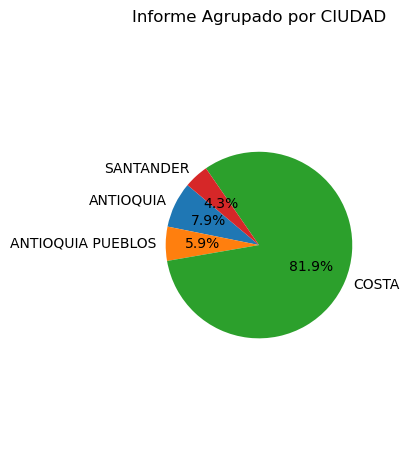

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Generar informe agrupado por ciudad
informe = data.groupby('CIUDAD')['VALOR FACTURA'].sum()

plt.subplot(1, 2, 2) 
plt.pie(informe, labels=informe.index, autopct='%1.1f%%', startangle=140)
plt.title('Informe Agrupado por CIUDAD')
plt.axis('equal')  
plt.tight_layout()

plt.show()


In [29]:
import pandas as pd

# Cargar el archivo Excel
ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Clasificación de los rangos de mora y creación de la columna 'RANGO MORA'
data['RANGO MORA'] = pd.cut(data['DIAS MORA'], bins=[-1, 90, 240, float('inf')],
                            labels=['RECUPERABLE', 'RIESGO', 'CASTIGO'])


print(data[['DIAS MORA', 'RANGO MORA']])


     DIAS MORA   RANGO MORA
0           85  RECUPERABLE
1           80  RECUPERABLE
2           85  RECUPERABLE
3           77  RECUPERABLE
4           77  RECUPERABLE
..         ...          ...
906         79  RECUPERABLE
907         83  RECUPERABLE
908         72  RECUPERABLE
909         83  RECUPERABLE
910         63  RECUPERABLE

[911 rows x 2 columns]


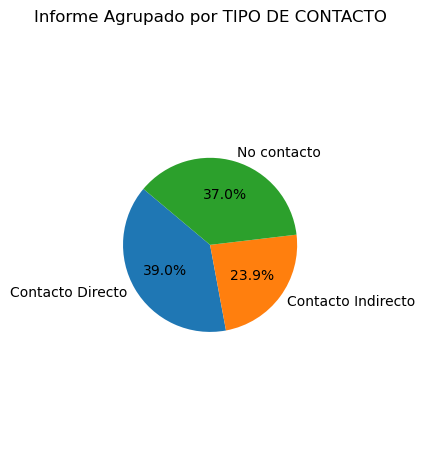

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Generar informe agrupado por TIPO DE CONTACTO
informe = data.groupby('TIPO DE CONTACTO')['VALOR FACTURA'].sum()

plt.subplot(1, 2, 2)  # Subplot para el gráfico de torta
plt.pie(informe, labels=informe.index, autopct='%1.1f%%', startangle=140)
plt.title('Informe Agrupado por TIPO DE CONTACTO')
plt.axis('equal')  
plt.tight_layout()

plt.show()


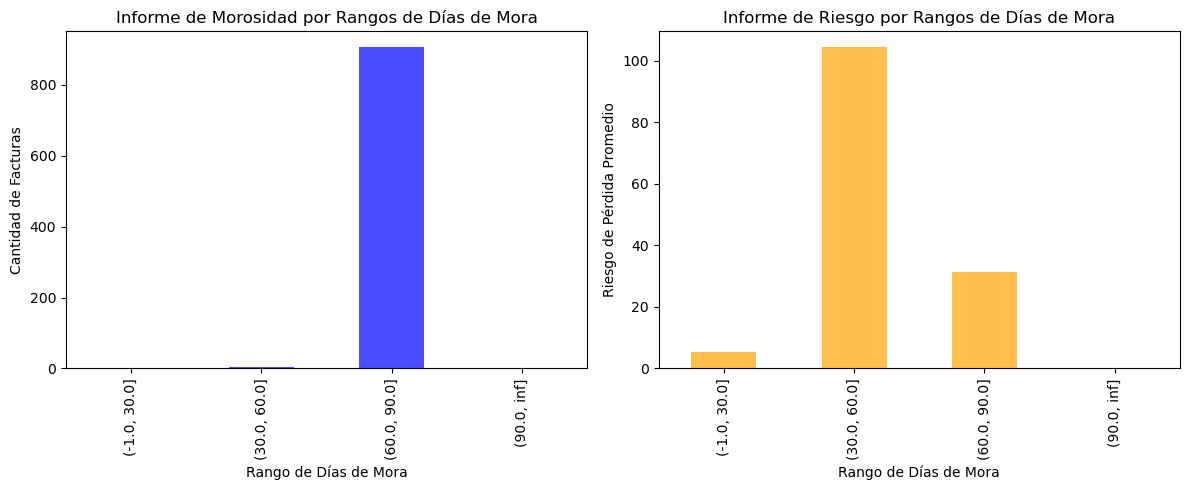

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Informe de morosidad por rangos de días de mora
mora_por_dias = data.groupby(pd.cut(data['DIAS MORA'], bins=[-1, 30, 60, 90, float('inf')]))['DIAS MORA'].count()

# Informe de riesgo por rangos de días de mora
riesgo_por_dias = data.groupby(pd.cut(data['DIAS MORA'], bins=[-1, 30, 60, 90, float('inf')]))['ANTIGUEDAD'].mean()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mora_por_dias.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Informe de Morosidad por Rangos de Días de Mora')
plt.xlabel('Rango de Días de Mora')
plt.ylabel('Cantidad de Facturas')

plt.subplot(1, 2, 2)
riesgo_por_dias.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Informe de Riesgo por Rangos de Días de Mora')
plt.xlabel('Rango de Días de Mora')
plt.ylabel('Riesgo de Pérdida Promedio')
plt.tight_layout()

plt.show()


In [35]:
import pandas as pd

# Cargar el archivo Excel
ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Realizar la resta entre las columnas 'Valor Factura' y 'Saldo'
data['Valor Cancelado'] = data['VALOR FACTURA'] - data['SALDO']

# Calcular el porcentaje del valor cancelado con respecto al valor factura
data['Porcentaje Cancelado'] = ((data['Valor Cancelado'] / data['VALOR FACTURA']) * 100).astype(int)

# Agregar el símbolo '%' al porcentaje
data['Porcentaje Cancelado'] = data['Porcentaje Cancelado'].astype(str) + '%'

# Mostrar solo las columnas 'Valor Factura', 'Saldo' y 'Porcentaje Cancelado'
print(data[['VALOR FACTURA', 'SALDO', 'Porcentaje Cancelado']])


     VALOR FACTURA   SALDO Porcentaje Cancelado
0           162948   29122                  82%
1           215156   85156                  60%
2           113631  113525                   0%
3           187560   87438                  53%
4           177603   32465                  81%
..             ...     ...                  ...
906         225425  100386                  55%
907         128619   30820                  76%
908         334580   54542                  83%
909         208044   22913                  88%
910         160606   37412                  76%

[911 rows x 3 columns]


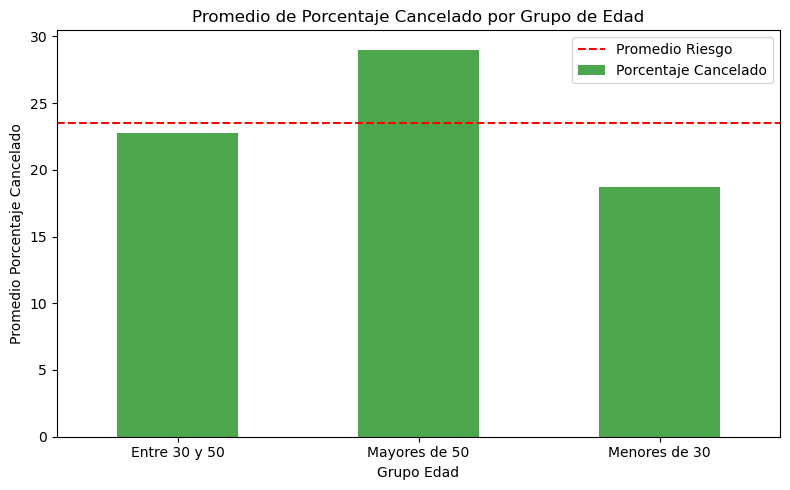

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

data['FECHA NACIMIENTO'] = pd.to_datetime(data['FECHA NACIMIENTO'])

hoy = pd.to_datetime('today')
data['EDAD ACTUAL'] = (hoy - data['FECHA NACIMIENTO']).astype('<m8[Y]')

# Definir los grupos de edad
def asignar_grupo_edad(edad):
    if edad < 30:
        return 'Menores de 30'
    elif 30 <= edad < 50:
        return 'Entre 30 y 50'
    else:
        return 'Mayores de 50'

data['Grupo Edad'] = data['EDAD ACTUAL'].apply(asignar_grupo_edad)

data['Valor Cancelado'] = data['VALOR FACTURA'] - data['SALDO']

data['Porcentaje Cancelado'] = ((data['Valor Cancelado'] / data['VALOR FACTURA']) * 100).astype(int)

promedio_por_grupo = data.groupby('Grupo Edad')['Porcentaje Cancelado'].mean()

plt.figure(figsize=(8, 5))
promedio_por_grupo.plot(kind='bar', color='green', alpha=0.7)
plt.axhline(y=promedio_por_grupo.mean(), color='red', linestyle='--', label='Promedio Riesgo')
plt.title('Promedio de Porcentaje Cancelado por Grupo de Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Promedio Porcentaje Cancelado')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

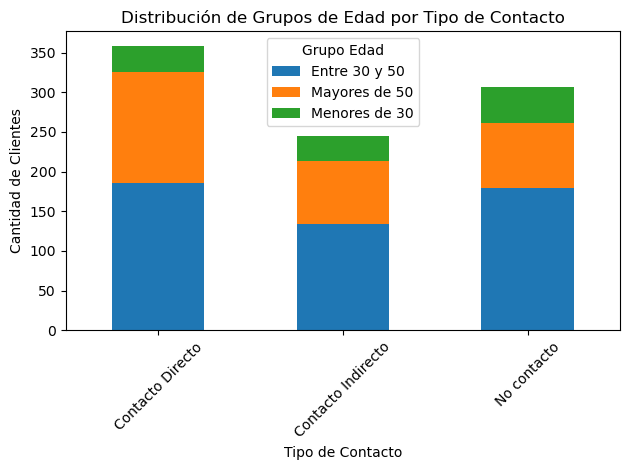

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta_archivo_excel = 'dataCreditos.xls'
data = pd.read_excel(ruta_archivo_excel)

# Convertir la columna 'Fecha de Nacimiento' a datetime
data['Fecha de Nacimiento'] = pd.to_datetime(data['FECHA NACIMIENTO'])

# Calcular la edad actual basada en la fecha de nacimiento
hoy = pd.to_datetime('today')
data['EDAD ACTUAL'] = (hoy - data['FECHA NACIMIENTO']).astype('<m8[Y]')

# Definir los grupos de edad
def asignar_grupo_edad(edad):
    if edad < 30:
        return 'Menores de 30'
    elif 30 <= edad < 50:
        return 'Entre 30 y 50'
    else:
        return 'Mayores de 50'

# Agregar la columna 'Grupo Edad'
data['Grupo Edad'] = data['EDAD ACTUAL'].apply(asignar_grupo_edad)

# Crear un gráfico de barras agrupando por tipo de contacto y grupo de edad
grupo_edad_tipo_contacto = data.groupby(['TIPO DE CONTACTO', 'Grupo Edad'])['TIPO DE CONTACTO'].count().unstack()

# Crear el gráfico de barras agrupado por tipo de contacto
plt.figure(figsize=(10, 6))
grupo_edad_tipo_contacto.plot(kind='bar', stacked=True)
plt.title('Distribución de Grupos de Edad por Tipo de Contacto')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Grupo Edad')
plt.tight_layout()

plt.show()
